# (GoBike System Data)
## by (Mostafa Mohamed Mostafa)

## Investigation Overview

> I will analyze the GoBike System data, my visualization will talk about the duration, start_time(day, hour) and user type

## Dataset Overview

> dataset has 183412 rows and 16 column .
 1   duration_sec
 2   start_time
 3   end_time
 4   start_station_id
 5   start_station_name
 6   start_station_latitude
 7   start_station_longitude
 8   end_station_id
 9   end_station_name
 10  end_station_latitude
 11  end_station_longitude
 12  bike_id
 13  user_type
 14  member_birth_year
 15  member_gender
 16  bike_share_for_all_trip

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import matplotlib.gridspec as gridspec
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [3]:
df[['start_time','end_time']]= df[['start_time','end_time']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')
df['user_type']= df['user_type'].astype('category')
df['month']= df.start_time.dt.strftime('%b')
df['day']= df.start_time.dt.strftime('%a')
df['hour']= df.start_time.dt.strftime('%H')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Feb,Thu,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Feb,Thu,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Feb,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Feb,Thu,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Feb,Thu,23


## (Visualization 1)

> the most common values almost in the range of 200:1K seconds.

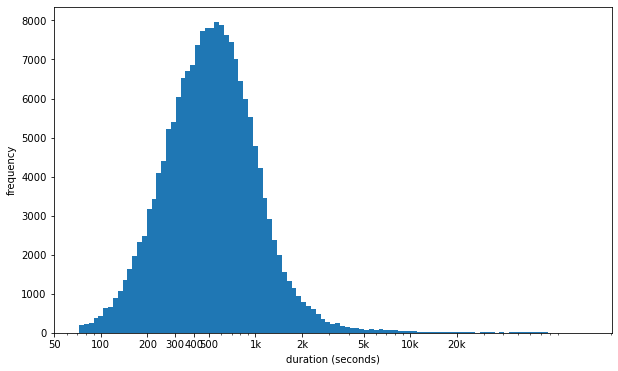

In [4]:
plt.figure(figsize=[10,6])
bins= 11** np.arange(np.log10(df.duration_sec.min()), np.log10(df.duration_sec.max())+0.03, 0.03)
plt.hist(data=df, x='duration_sec',bins=bins)
plt.xscale('log')
plt.xticks([50,100,200,300,400,500, 1e3, 2e3, 5e3, 1e4, 2e4], [50,100,200,300,400,500,'1k','2k','5k','10k','20k'])
plt.xlabel('duration (seconds)')
plt.ylabel('frequency');

## (Visualization 2)

> Subscriber type is the most common type

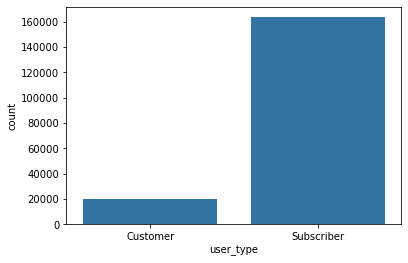

In [5]:
base_color= sb.color_palette()[0]
sb.countplot(data=df, x='user_type',color=base_color);

## (Visualization 3)



> 1- all trips happened at February month. 2- Wednesday , Friday almost equal . 3- Thursday have the most bikers. 4- 5 PM, 8 AM is the most hours have bikers.

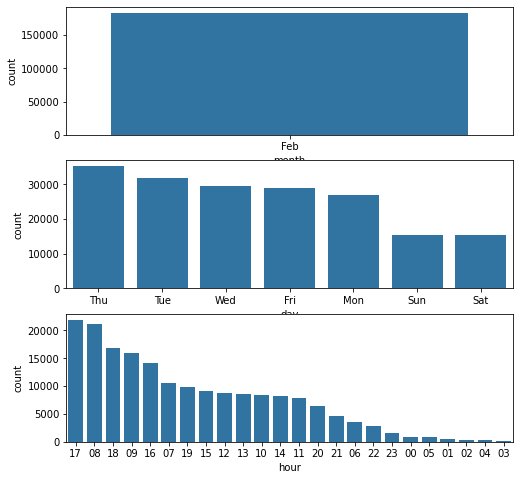

In [9]:
fig, ax = plt.subplots(nrows=3, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'month', color = default_color, order=df.month.value_counts().index, ax = ax[0])
sb.countplot(data = df, x = 'day', color = default_color, order=df.day.value_counts().index, ax = ax[1])
sb.countplot(data = df, x = 'hour', color = default_color, order=df.hour.value_counts().index, ax = ax[2]);

> Saturday and Sunday have the most average duration.

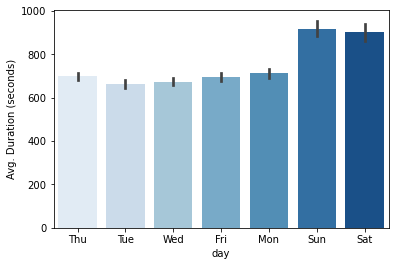

In [12]:
sb.barplot(data = df, x = 'day', y = 'duration_sec', palette='Blues',order=df.day.value_counts().index)
plt.ylabel('Avg. Duration (seconds)');